<div><center><img src="https://ml.ucv.ai/logo.png" width="150"/> </center></div>

# Máquinas de Soporte Vectorial (SVM)

## Versión b.1

El notebook lo puedo modificar, esta versión es la b.1 a 05/07/2024 a las 13:00 Caracas.

## Aprendizaje Automático [UCV]


* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be
----


# 1 Clasificación binaria

Sea $X$ el conjunto de datos de entrenamiento con $(x_i, y_i) \text{ para } i \in \{1, \dots, n\}$ con:
1. $x_i \in \mathbb{R}^p$
1. $y_i \in \{-1, 1\}$

Buscamos

$$
f\left(\mathbf{x}_i\right) \begin{cases}\geq 0 & y_i=+1 \\ <0 & y_i=-1\end{cases}
$$



## 1.1 clasificación correcta?

Cualquier caso donde $y_i f\left(\mathbf{x}_i\right) > 0 $

# 2 Conjunto de datos linealmente separables

## 2.1 Informalmente qué buscamos?

Dos conjuntos de datos $X_A$ y $X_B$ son linealmente separables si existe un hiperplano $w$ tal que todos los elementos de un conjunto están de un lado y todos los elementos del otro conjunto están del otro lado.




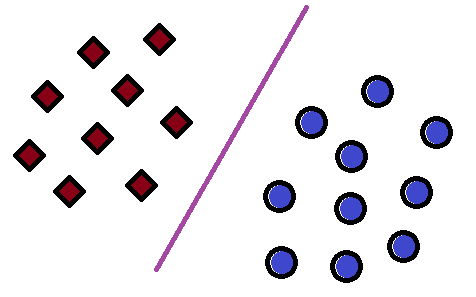

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [ ]:
def plot_data(X, y, xi=None, yi=None):
  plt.figure(figsize=(10,10))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

  if xi is None or yi is None:
    plt.show()
    return 1

  plt.scatter(xi, yi, c=[3] if len(xi) == 1 else [3, 4], s=30)

  plt.scatter(
      xi,
      yi,
      s=100,
      linewidth=1,
      facecolors="none",
      edgecolors="k",
  )
  if len(xi) == 2:
    plt.plot(xi, yi, 'k-')
  plt.show()


In [ ]:
# we create 40 separable points
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1)

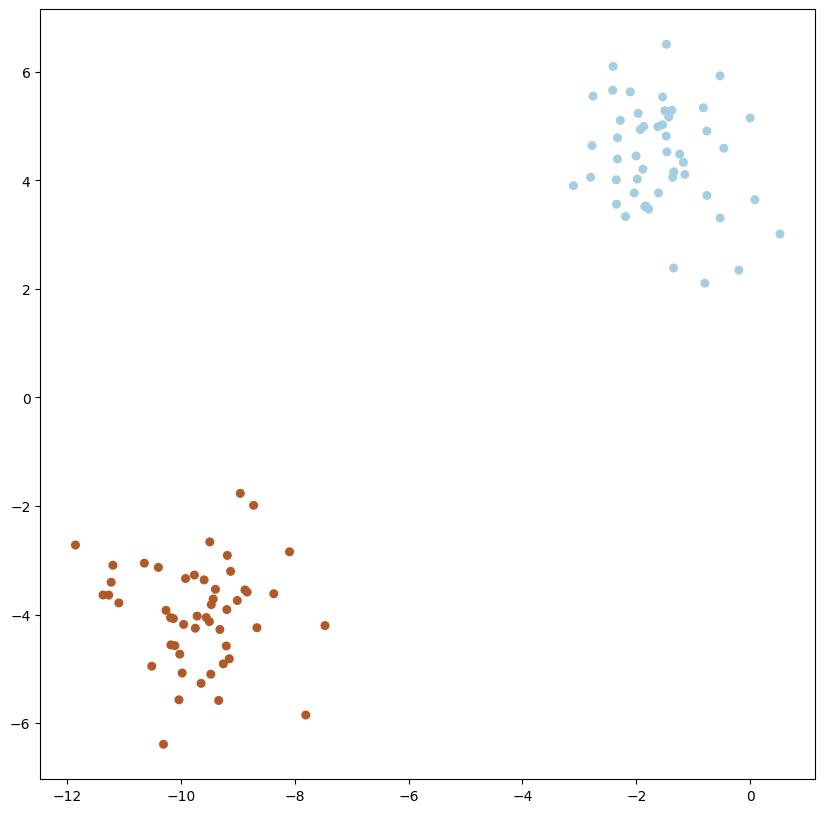

1

In [ ]:
plot_data(X, y)


## 1.2.2 Definición formal
En nuestro contexto, los conjuntos los podemos definir como:

1. $X_0 = \{ x_i \text{ tal que } y_i = 0\}$ y análogamente
1. $X_1 = \{ x_i \text{ tal que } y_i = 1\}$

Sean $X_0$ y $X_1$ dos conjuntos de puntos definidos en un espacio $n$-dimensional Euclideano. Entonces $X_0$ y $X_1$ son linealmente separables si existen $n+1$ escalares $w_1, w_2, \ldots, w_n, k$, tales que
para cada punto $x_0 \in X_0$ satisface $$w^t x_0 = \sum_{i=1}^n w_i x_{0i}>k$$ y cada punto $x_1 \in X_1$ satisface $$w^t x_1 = \sum_{i=1}^n w_i x_{1i}<k$$, donde $x_i$ es la $i$-ésima componente de $x$.

# 3 Hiperplanos

## 3.1 Definición

Un hiperplano es un conjunto de la forma
$$
\left\{x \mid a^T x=b\right\},
$$
donde $a \in \mathbf{R}^n, a \neq 0$ y $b \in \mathbf{R}$.

1. Analíticamente es el conjunto solución de una ecuación lineal no trivial entre los componentes de $x$ (y por tanto un conjunto afín).
1. Geométricamente, el hiperplano $\left\{x \mid a^T x=b\right\}$ puede interpretarse como:
  - el conjunto de puntos con un producto interno constante a un vector dado $a$,
  - o como un hiperplano con normal vector $a$; la constante $b \in \mathbb{R}$ determina el desplazamiento del hiperplano desde el origen.

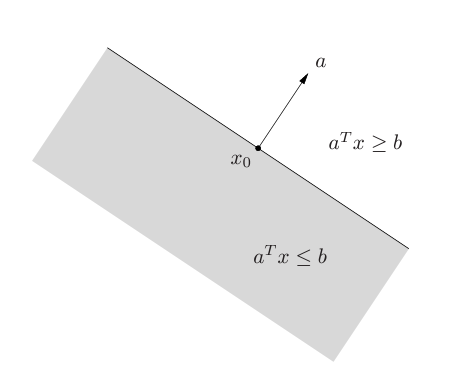

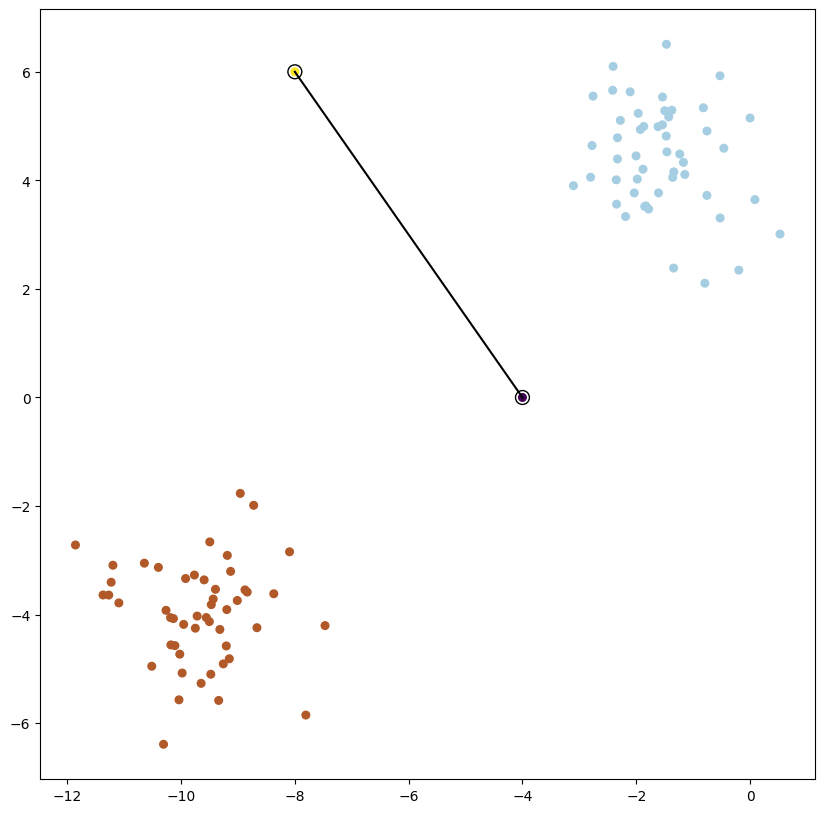

In [ ]:
plot_data(X, y, xi=np.array([-4, -8]), yi=np.array([0, 6]))

## 3.2 Derivando un hiperplano

La ecuación de la recta que pasa por dos puntos:

$\displaystyle\frac{y-y0}{y1-y0} = \frac{x-x0}{x1-x0}$ si desarrollamos tenemos:



In [ ]:
def ecuacion_dos_puntos(x0, y0, x1, y1):
  """
  Calcula la ecuación de la recta que pasa por dos puntos.
  x0, y0 son las coordenadas del primer punto
  x1, y1 son las coordenadas del segundo punto

  Retorna w, b con w el vector normal y b el punto de intersección con el eje y
  """
  m = (y1-y0)/(x1-x0)
  w = np.array([-m, 1])
  b = y0 - x0*m

  return w, b


In [ ]:
w, b = ecuacion_dos_puntos(-4, 0, -8, 6)

In [ ]:
w

array([1.5, 1. ])

In [ ]:
b

-6.0

In [ ]:
w @ np.array([-6, -2])

-11.0

In [ ]:
import numpy as np

def find_hyperplane(x0, y0, x1, y1):
    # Calcular el vector ortogonal a los dos puntos
    w = np.array([y1 - y0, x0 - x1])

    # Calcular el escalar b
    b = - (w[0] * x0 + w[1] * y0)

    return w, b

# Ejemplo:
x0, y0 = -4, 0
x1, y1 = -8, 6
w, b = find_hyperplane(x0, y0, x1, y1)
print("Vector w:", w)
print("Scalar b:", b)

Vector w: [6 4]
Scalar b: 24


# 4 Máquinas de Soporte Vectorial

## 4.1 Qué buscamos?

El mejor hiper plano posible!!!

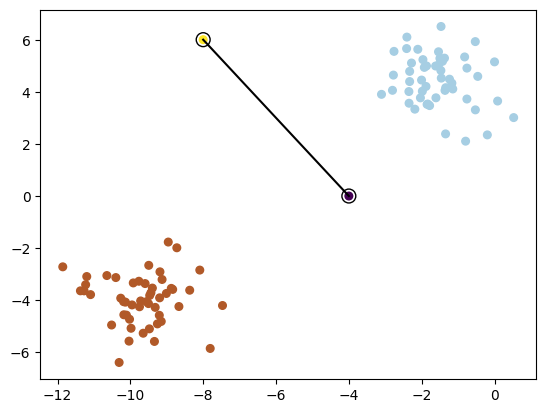

In [ ]:
plot_data(X, y, xi=np.array([-4, -8]), yi=np.array([0, 6]))

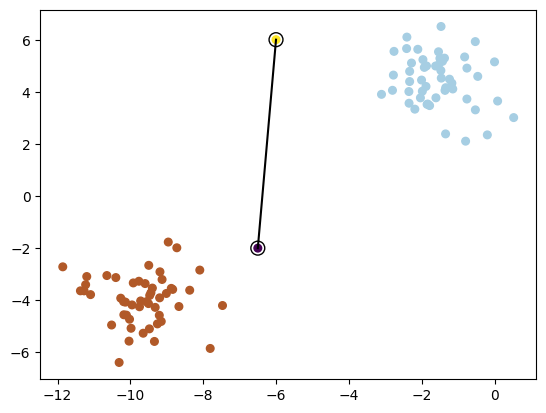

In [ ]:
plot_data(X, y, xi=np.array([-6.5, -6]), yi=np.array([-2, 6]))

## 4.2 Cuántos hay?

Hay infinitos!!!



## 4.3 Definiendo mejor nuestro problema para mitigar 4.2

Para lograr una solución única es importante definir el problema que queremos resolver.

1. Queremos el hiperplano que maximice la distancia entre los dos conjuntos linealmente separables. Esa distancia, que debemos definir, es conocida como el margen (_margin_).
1. Definimos las clases "positivas" o azul como +1 y las negativas o rojas como -1.

### 4.3.1 Formulación

Sea $w$ el vector normal al hiperplano que buscamos.

1. Si $x_+$ entonces $w \cdot x_+ + b \geq 1$
1. Si $x_-$ entonces $w \cdot x_- + b \leq -1$

Ahora introducimos las clases. Para este caso:
1. Si $x_+$ entonces $y_+ = 1$
1. Si $x_-$ entonces $y_- = -1$



#### 4.3.1.1 Cómo podemos usar las clases?

Ahora premultiplicamos nuestras restricciones por $y_i$

1. Si $x_+$ entonces $y_+(w \cdot x_+ + b) \geq y_+$
1. Si $x_-$ entonces $y_-(w \cdot x_- + b ) \leq y_i \cdot-1 = y_-(w \cdot x_- + b) \geq 1$ porque al multiplicar por $-1$ cambia el lado de la desigualdad.

Ahora tenemos las mismas restricciones !! sin importar la clase $y_i$ o dato $x_i$ $$y_i(w \cdot x_i + b) - 1\geq 0$$

Lo último que nos queda, es poder medir la distancia del margen.



#### 4.3.1.2 Midiendo la distancia del margen

El hiperplano sigue sin ser único.

Para poder medir la distancia del margen, basta con multiplicar un vector unitario normal que conecte un punto $x_+$ con uno $x_-$ que estén en el margen.

Pero ya sabemos que $w$ es normal! falta solo hacerlo unitario!

$$\text{margen} = (x_+ - x_-) \cdot \frac{w}{\|w\|}$$

Pero sabemos dos cosas. Sean $x_+$ y $x_-$ dos puntos en el margen de la clase $1$ y $-1$ respectivamente.

1. $y_+(w \cdot x_+ - b) - 1 = 0$ entonces $w \cdot x_+ = 1 - b$
1. $y_-(w \cdot x_- -b) -1 = 0 \implies -(w \cdot x_- -b) -1 = 0 \implies -w \cdot x_- +b -1 = 0 \implies w \cdot x_- = 1 + b$

Por lo que:

$$\|\text{margen}\| = (x_+ - x_-) \cdot \frac{w}{\|w\|} = \frac{1-b + 1 + b}{\|w\|} = \frac{2}{\|w\|}$$

Para maximizar $w$ debemos minimizar su norma!!!!



## 4.4 Problema de optimización

El problema de SVM, es, en consecuencia

$$SVM\;\;\underset{w}{min}\;\;\frac{\|w\|}{2}\;\;s.a.$$
$$y_i(w \cdot x_i + b) - 1\geq 0$$
$$w \in \mathbb{R}^m,\;\;y_i \in \mathbb{R}^n,\;\;x_i \in \mathbb{R}^{m} \text{ con } i \in [1, n]$$

# 5 SVM - soft margin

Tenemos un problema en este momento:

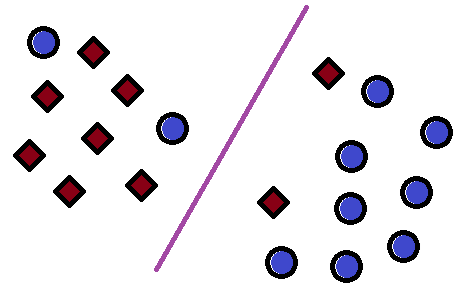


## 5.1 Qué sucede para conjuntos de datos que no son separables?

Como hemos definido el problema, SVM solamente va a funcionar si el conjunto de datos es linealmente separable. Si falla una sola restricción, el problema no es factible.

## 5.2 Formulación con variables de holgura (Soft Margin)

A partir de ahora, si la formulación no tiene variables de holgura denonimamos al problema SVM hard margin.

Debemos ahora introducir holguras. Una holgura es un margen de error que le podemos dar a un punto erróneamente clasificado para que se desplace al margen correcto relativo a su clase.

Para lograr esto, veamos visualmente qué necesitamos:



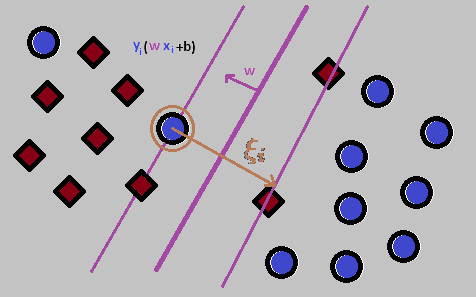

### 5.2.1 Las holguras

Para cada punto muestral, dejamos que variables positivas, llamadas de holgura, tomen valores para "mover" el punto a su respectivo margen. En consecuencia, todos los puntos que están erróneamente clasificados ahora serán factibles. Esto es:

$$ y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i $$

### 5.2.2 Formulación con holguras

Por lo que nuestro problema de optimización sería:

$$ \underset{\mathbf{w}, \xi}{min}\;\; \frac{1}{2} \|\mathbf{w}\|^2 + \sum_{i=1}^n \xi_i \;\; \text{  sujeto a }$$

$$ y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i $$

### 5.2.3 Problema con la formulación

Es claro que no podemos ponderar entre maximizar el margen y minimizar el error de clasificación.

Qué es más importante para nosotros?


## 5.3 Formulación de SVM soft-margin

Para _regularizar_ el rol de las variables de holgura, agregamos un parámetro $C$ que pondera los errores.

1. Si $C=0$ el problema solamente es factible si SVM-Hard es factible.
1. Si $C >> 0$ vamos a darle énfasis al error de clasificación, trayendo como consecuencia reducción del margen a costo de que la menor cantidad de holguras se activen.

$$ \underset{\mathbf{w}, \xi}{min}\;\; \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i $$


Sujeto a :
$$ y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i $$

--------
# 6 Teoría de dualidad

## 6.1 Usando el problema dual

$$ \underset{\mathbf{w}, \xi}{min}\;\; \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i $$

Sujeto a :
$$ y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i $$

El lagrangiano para este problema viene dado por:

$$ \mathcal{L}(\mathbf{w}, b, \boldsymbol{\xi}, \boldsymbol{\alpha}, \boldsymbol{\beta}) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i - \sum_{i=1}^n \alpha_i [y_i (\mathbf{w}^\top \mathbf{x}_i + b) - 1 + \xi_i] - \sum_{i=1}^n \beta_i \xi_i $$

Aquí, $$\boldsymbol{\alpha} = (\alpha_1, \alpha_2, \ldots, \alpha_n) \text{ y } \boldsymbol{\beta} = (\beta_1, \beta_2, \ldots, \beta_n)$$ son los multiplicadores de Lagrange.

La forma dual se obtiene maximizando el lagrangiano con respecto a $\mathbf{w}$, $b$ y $\boldsymbol{\xi}$ y luego minimizando con respecto a los multiplicadores de Lagrange.

Primero, tomando las derivadas parciales de $\mathcal{L}$ con respecto a $\mathbf{w}$, $b$ y $\boldsymbol{\xi}$ y estableciéndolas en cero:

$$ \frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i = 0 \implies \mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i $$

$$ \frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^n \alpha_i y_i = 0 $$

$$ \frac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \beta_i = 0 \implies \alpha_i \leq C $$

## 6.2 Condiciones KKT para SVM

1. **Restricciones primarias:**
 $ y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i $
 $ \xi_i \geq 0 $

2. **Restricciones duales:**
 $ \alpha_i \geq 0 $
 $ \beta_i \geq 0 $
 $ \alpha_i \leq C $

3. **Flojedad complementaria:**
 $ \alpha_i [y_i (\mathbf{w}^\top \mathbf{x}_i + b) - 1 + \xi_i] = 0 $
 $ \beta_i \xi_i = 0 $

4. **Estacionariedad:**
 $ \mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i $
 $ C - \alpha_i - \beta_i = 0 $

5. **Viabilidad dual:**
 $ \sum_{i=1}^n \alpha_i y_i = 0 $
 $ 0 \leq \alpha_i \leq C$

### 6.2.1 Resumen de las condiciones de KKT

- Las restricciones de **factibilidad** para el primal aseguran que las soluciones para $\mathbf{w}$, $b$ y $\xi_i$ sean factibles en el problema primario.
- Las restricciones de **factibilidad** para el **dual** garantizan que los multiplicadores de Lagrange ($\alpha_i$ y $\beta_i$) no sean negativos y estén acotados.
- **Estacionariedad** implica establecer el gradiente del lagrangiano con respecto a $\mathbf{w}$, $b$ y $\xi_i$ en cero, asegurando que las soluciones primal y dual estén vinculadas.
- **La holgura complementaria** garantiza que la restricción esté activa (es decir, que el margen se cumpla exactamente) o que el multiplicador de Lagrange correspondiente sea cero.

Estas condiciones deben cumplirse en la solución óptima del problema SVM, asegurando que tanto la solución primaria como la dual sean óptimas y consistentes entre sí.

## 6.3 El dual

Sustituyéndolos nuevamente en el lagrangiano, obtenemos el problema dual:


$$ \underset{\alpha}{max}\;\; W(\boldsymbol{\alpha}) \\ \underset{\alpha}{max}  \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^\top \mathbf{x}_j \;\; \text{ sujeto a}$$


$$ \sum_{i=1}^n \alpha_i y_i = 0 $$
$$ 0 \leq \alpha_i \leq C, \quad \forall i $$

Por lo tanto, el problema dual del SVM es un problema de programación cuadrática que busca maximizar la función objetivo $W(\boldsymbol{\alpha})$ sujeta a las restricciones dadas.

--------

### 6.3.1 La solución del problema

Resolviendo el problema usando las KKT llegamos a:

$$
f(\mathbf{x})=\sum_i^N \alpha_i y_i\left(\mathbf{x}_i{ }^{\top} \mathbf{x}\right)+b
$$


## 6.4 La solución del dual y el teorema de representación


El teorema de representación prueba que la solución para $\mathbf{w}$ puede ser siempre escrita como una combinación lineal de los datos:
$$
\mathbf{w}=\sum_{j=1}^N \alpha_j y_j \mathbf{x}_j
$$


### 6.4.1 Cerrando el ciclo

Ahora, sustituyamos $\mathbf{w}$ en $f(x)=\mathbf{w}^{\top} \mathbf{x}+b$
$$
f(x)=\left(\sum_{j=1}^N \alpha_j y_j \mathbf{x}_j\right){ }^{\top} \mathbf{x}+b=\sum_{j=1}^N \alpha_j y_j\left(\mathbf{x}_j{ }^{\top} \mathbf{x}\right)+b
$$
y para $\mathbf{w}$ en la función objetivo $\min _{\mathbf{w}}\|\mathbf{w}\|^2$ sujeto a  $y_i\left(\mathbf{w}^{\top} \mathbf{x}_i+b\right) \geq 1, \forall i$
$$
\|\mathbf{w}\|^2=\left\{\sum_j \alpha_j y_j \mathbf{x}_j\right\} \top\left\{\sum_k \alpha_k y_k \mathbf{x}_k\right\}=\sum_{j k} \alpha_j \alpha_k y_j y_k\left(\mathbf{x}_j^{\top} \mathbf{x}_k\right)
$$

En consecuencia, un problema equivalente se puede escribir sobre las  $\alpha_j$
$$
\min _{\alpha_j} \sum_{j k} \alpha_j \alpha_k y_j y_k\left(\mathbf{x}_j{ }^{\top} \mathbf{x}_k\right) \text { sujeto a } y_i\left(\sum_{j=1}^N \alpha_j y_j\left(\mathbf{x}_j{ }^{\top} \mathbf{x}_i\right)+b\right) \geq 1, \forall i
$$


### 6.4.2 Cuándo resolver el primal y cuándo el dual?

Sea $N$ el número de puntos del entrenamiento, y $p$ la dimensiób del vector de características $\mathbf{x}$.

1. Problema primal: Para $\mathbf{w} \in \mathbb{R}^p$
$$
\min _{\mathbf{w} \in \mathbb{R}^p}\|\mathbf{w}\|^2+C \sum_i^N \max \left(0,1-y_i f\left(\mathbf{x}_i\right)\right)
$$

1. Problema dual: para $\boldsymbol{\alpha} \in \mathbb{R}^N$:
$$
\max _{\alpha_i \geq 0} \sum_i \alpha_i-\frac{1}{2} \sum_{j k} \alpha_j \alpha_k y_j y_k\left(\mathbf{x}_j^{\top} \mathbf{x}_k\right) \text { sujeto a } 0 \leq \alpha_i \leq C \text { for } \forall i \text {, and } \sum_i \alpha_i y_i=0
$$
- Necesitamos aprender $p$ parámetros para el primal, y $N$ para el dual
- Es claro que si $N \ll<p$ es más eficiente resolver para $\alpha$ que para $\mathbf{w}$
- El problema dual implica usar $\left(\mathbf{x}_j^{\top} \mathbf{x}_k\right)$.

### 6.4.3 Las soluciones para ambos problemas

Clasificador para el primal:
$$
f(\mathbf{x})=\mathbf{w}^{\top} \mathbf{x}+b
$$

Clasificador para el dual:
$$
f(\mathbf{x})=\sum_i^N \alpha_i y_i\left(\mathbf{x}_i{ }^{\top} \mathbf{x}\right)+b
$$

Qué sentido tiene, entonces, usar el dual si la dimensión del problema (número de parámetros) es N?

El resultado más impresionante que tenemos:

> Todos los $\alpha_i$ que NO están en el margen son cero!. Aquellos donde $\alpha_i \neq 0 $ son los vectores soporte.

# 7 El truco del Kernel

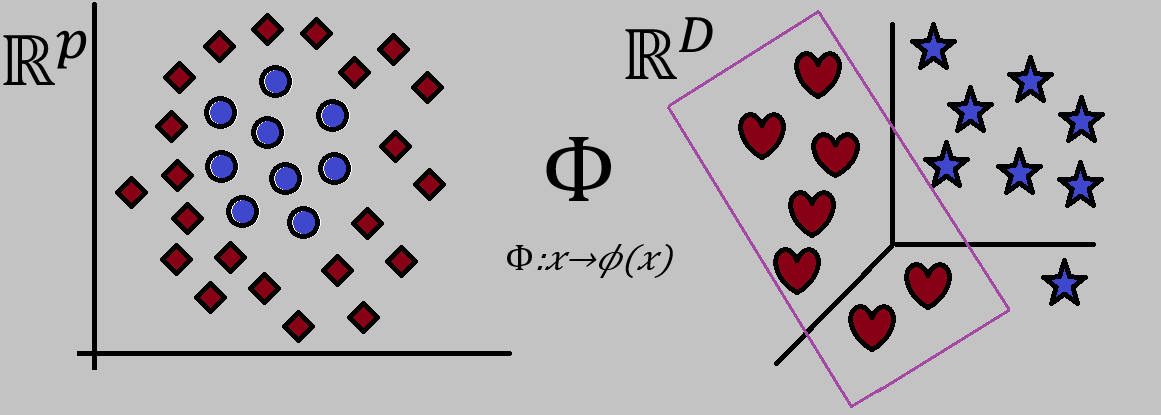

Por qué no aprender un clasificador lineal en $\mathrm{w}$ para $\mathbb{R}^D$?
$$
f(\mathbf{x})=\mathbf{w}^{\top} \Phi(\mathbf{x})+b
$$
Tomando en cuenta que $\Phi(\mathbf{x})$ es una función de mappeo de características (_feature map_)

Clasificador, con $\mathbf{w} \in \mathbb{R}^D$ :
$$
f(\mathbf{x})=\mathbf{w}^{\top} \Phi(\mathbf{x})+b
$$

Aprender, para $\mathbf{w} \in \mathbb{R}^D$
$$
\min _{\mathbf{w} \in \mathbb{R}^D}\|\mathbf{w}\|^2+C \sum_i^N \max \left(0,1-y_i f\left(\mathbf{x}_i\right)\right)
$$
- Simplemente mapeamos $\mathbf{x}$ a $\Phi(\mathbf{x})$ donde la data es separable
- Resolvemos para $\mathbf{w}$ en un espacio cuya dimensión es mayor $\mathbb{R}^D$
- Si $D>>p$ hay más parámetros por aprender para $\mathbf{w}$. Podemos evitar esto?

## 7.1 El truco del kernel en el dual

Clasificador:
$$
\begin{aligned}
f(\mathbf{x}) & =\sum_i^N \alpha_i y_i \mathbf{x}_i^{\top} \mathbf{x}+b \\
\implies f(\mathbf{x}) & =\sum_i^N \alpha_i y_i \Phi\left(\mathbf{x}_i\right)^{\top} \Phi(\mathbf{x})+b
\end{aligned}
$$

Learning:
$$
\begin{aligned}
& \max _{\alpha_i \geq 0} \sum_i \alpha_i-\frac{1}{2} \sum_{j k} \alpha_j \alpha_k y_j y_k \mathbf{x}_j^{\top} \mathbf{x}_k \\
\implies & \max _{\alpha_i \geq 0} \sum_i \alpha_i-\frac{1}{2} \sum_{j k} \alpha_j \alpha_k y_j y_k \Phi\left(\mathbf{x}_j\right)^{\top} \Phi\left(\mathbf{x}_k\right) \;\; \text{sujeto a}
\end{aligned}
$$

$$
0 \leq \alpha_i \leq C \text { for } \forall i \text {, and } \sum_i \alpha_i y_i=0
$$

### 7.2 Usando los kernel

1. Tomen en cuenta que $\Phi(\mathbf{x})$ solo ocurre para los pares $\Phi\left(\mathbf{x}_j\right)^{\top} \Phi\left(\mathbf{x}_i\right)$
- Una vez los productos escalares son calculados, solo el vector $N$ dimensional $\boldsymbol{\alpha}$ necesita ser aprendido; NO es necesario aprender en el espacio $D$ dimensional space, como es en el caso del primal
- Definamos $k\left(\mathbf{x}_j, \mathbf{x}_i\right)=\Phi\left(\mathbf{x}_j\right)^{\top} \Phi\left(\mathbf{x}_i\right)$. Esto es conocido como un Kernel

Clasificador:
$$
f(\mathbf{x})=\sum_i^N \alpha_i y_i k\left(\mathbf{x}_i, \mathbf{x}\right)+b
$$

Problema a resolver:
$$
\max _{\alpha_i \geq 0} \sum_i \alpha_i-\frac{1}{2} \sum_{j k} \alpha_j \alpha_k y_j y_k k\left(\mathbf{x}_j, \mathbf{x}_k\right) \;\; \text{ sujeto a}
$$

$$
0 \leq \alpha_i \leq C \text { para } \forall i, \text { y } \sum_i \alpha_i y_i=0
$$

### 7.2.1 Ejemplos de kernel

$$
\begin{aligned}
& \Phi:\binom{x_1}{x_2} \rightarrow\left(\begin{array}{c}
x_1^2 \\
x_2^2 \\
\sqrt{2} x_1 x_2
\end{array}\right) \quad \mathbb{R}^2 \rightarrow \mathbb{R}^3 \\
& \begin{aligned}
\Phi(\mathbf{x})^{\top} \Phi(\mathbf{z}) & =\left(x_1^2, x_2^2, \sqrt{2} x_1 x_2\right)\left(\begin{array}{c}
z_1^2 \\
z_2^2 \\
\sqrt{2} z_1 z_2
\end{array}\right) \\
& =x_1^2 z_1^2+x_2^2 z_2^2+2 x_1 x_2 z_1 z_2 \\
& =\left(x_1 z_1+x_2 z_2\right)^2 \\
& =\left(\mathbf{x}^{\top} \mathbf{z}\right)^2
\end{aligned}
\end{aligned}
$$

- Kernels lineales $k\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\mathbf{x}^{\top} \mathbf{x}^{\prime}$
- Kernels polinomiales $k\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\left(1+\mathbf{x}^{\top} \mathbf{x}^{\prime}\right)^d$ para cualquier $d>0$
  - Contiene todos los terminos polinomiales hasta el grado $d$

## 7.3 Pero necesitamos $\Phi$?

- El clasificador puede ser aprendido sin necesidad de utilizar $\Phi(\mathrm{x})$
- Lo único que necesitamos es el kernel! $$k(\mathbf{x}, \mathbf{z})=\left(\mathbf{x}^{\top} \mathbf{z}\right)^2$$
- La complejidad para aprender va a depender de $N$ (típicamente el orden es$O\left(N^3\right)$ ) pero no $D$

## 7.4 Y qué sucede con la dimensión $D$? Ejemplos de kernel


- Kernel Gaussiano  $$k\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^2 / 2 \sigma^2\right) \;\; \text{ para } \sigma>0$$
  - Este kernel tiene dimensión infinita!!!

# 8 Probando con código

pero no siempre vamos a tener el caso donde todos nuestros puntos tienen predicción perfecta (el conjunto es separable)

Para mitigar esto, alguna

## Librerías y utilidades

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#### Referencia a link en scikit

In [ ]:
def add_point_to_plt(model, X, y, xi=None, yi=None):
  plt.figure(figsize=(10,6))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

  # plot the decision function
  ax = plt.gca()
  DecisionBoundaryDisplay.from_estimator(
      clf,
      X,
      plot_method="contour",
      colors="k",
      levels=[-1, 0, 1],
      alpha=0.5,
      linestyles=["--", "-", "--"],
      ax=ax,
  )
  # plot support vectors
  ax.scatter(
      clf.support_vectors_[:, 0],
      clf.support_vectors_[:, 1],
      s=100,
      linewidth=1,
      facecolors="none",
      edgecolors="k",
  )

  # Graph prediction

  if xi is None or yi is None:
    plt.show()

    return 1

  plt.scatter(xi, yi, c=3, s=30)

  ax.scatter(
    xi,
    yi,
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
  )
  plt.show()

In [ ]:
# we create 40 separable points
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=20)

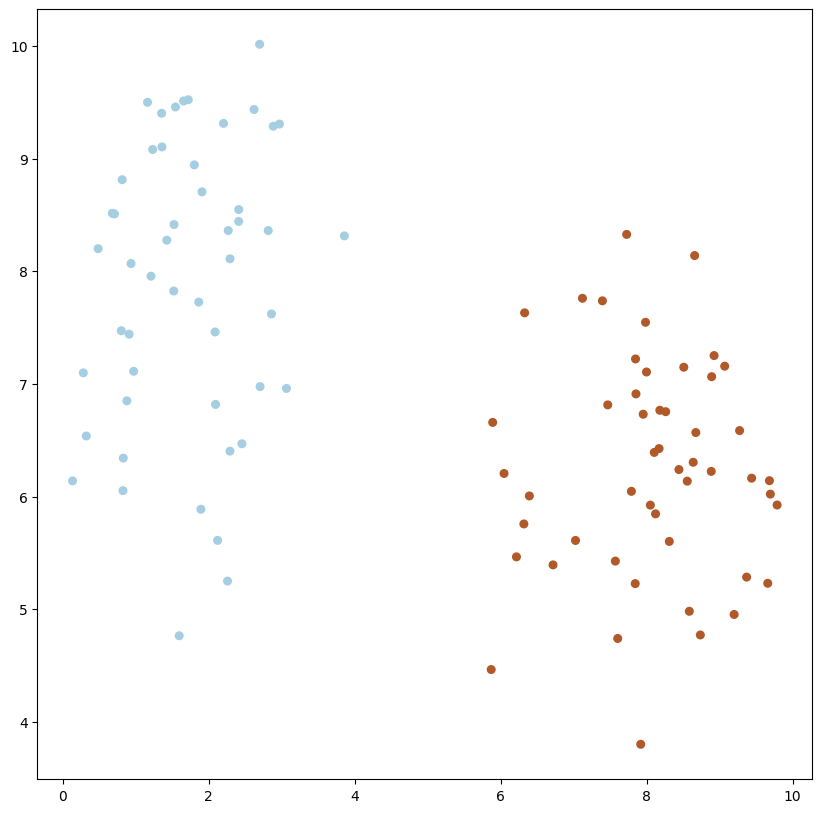

1

In [ ]:
plot_data(X, y)

In [ ]:
X_std, y_std = make_blobs(n_samples=100, n_features=2, centers=2, random_state=20, cluster_std=.5)

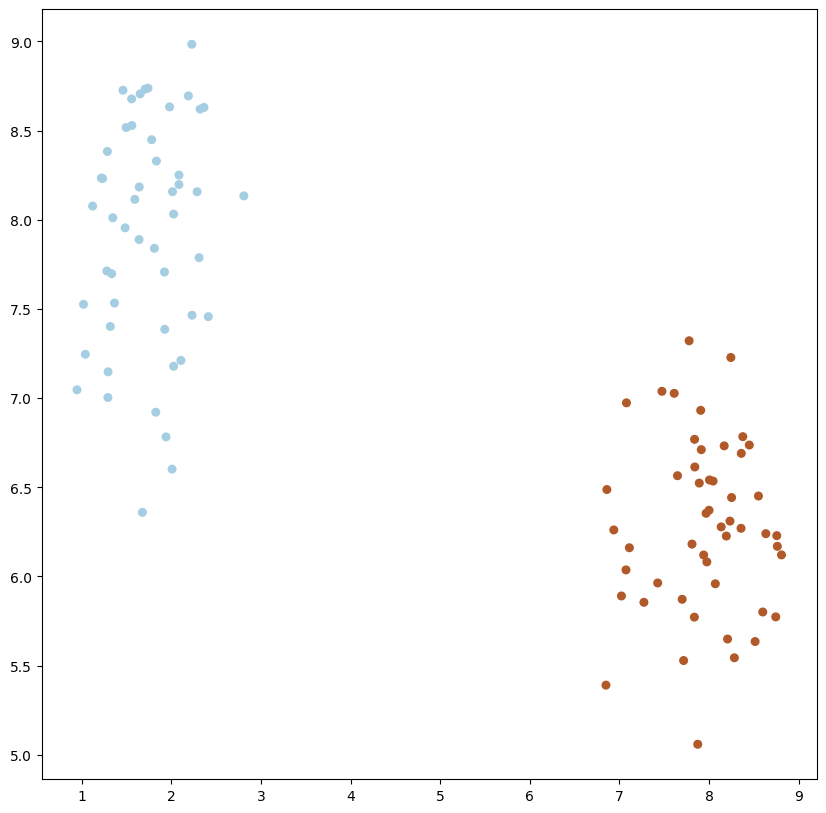

1

In [ ]:
plot_data(X_std, y_std)

### Usando Support Vector Classifier SVC

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)


SVC(C=1000, kernel='linear')

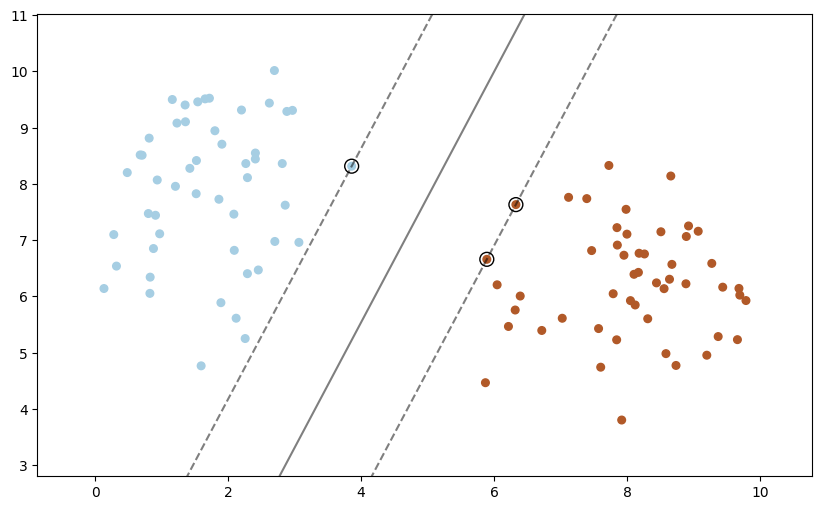

1

In [ ]:
add_point_to_plt(model=clf, X=X, y=y)

In [ ]:
clf.predict(np.array([2, 8]).reshape(1, 2))

array([0])

In [ ]:
X_std_2, y_std_2 = make_blobs(n_samples=100, n_features=2, centers=2, random_state=20, cluster_std=5)

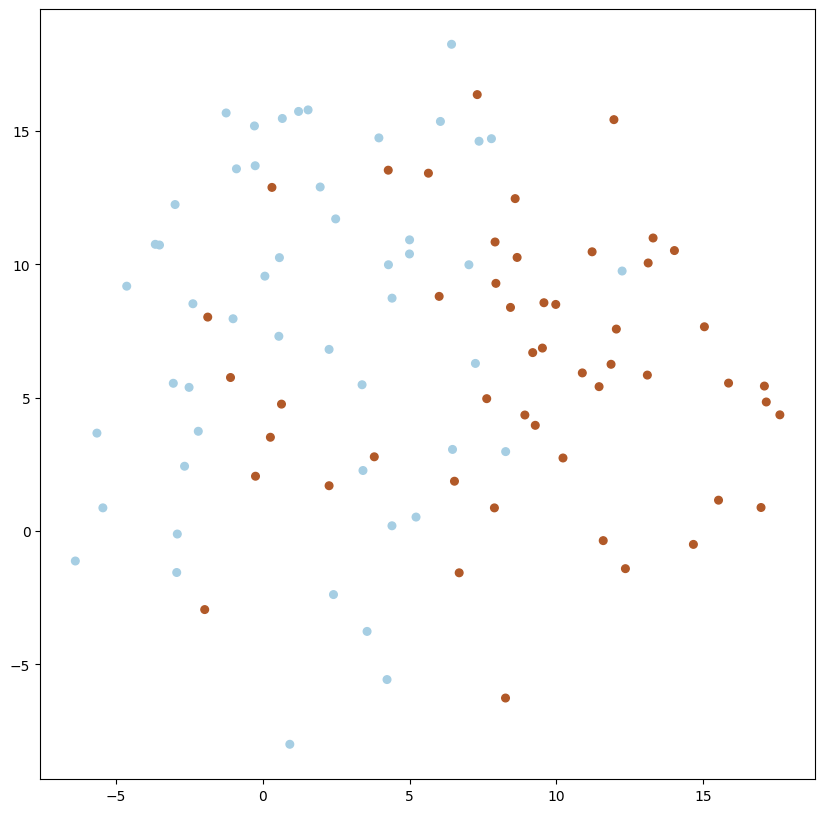

1

In [ ]:
plot_data(X_std_2, y_std_2)

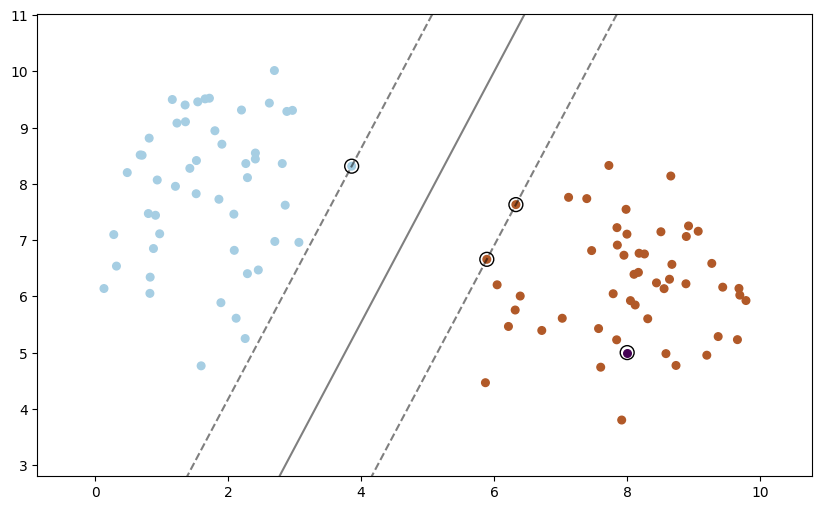

In [ ]:
add_point_to_plt(model=clf, X=X, y=y, xi=8, yi=5)

### El criterio de decisión

In [ ]:
X, y = make_moons(noise=0.3, random_state=0)

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

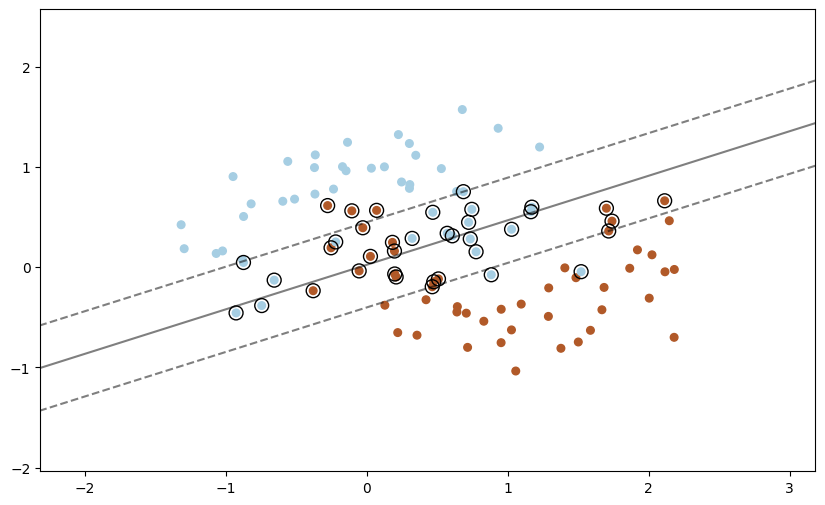

1

In [ ]:
add_point_to_plt(model=clf, X=X, y=y)

In [ ]:
# fit the model, don't regularize for illustration purposes
rbf = svm.SVC(kernel="rbf", C=1000)
rbf.fit(X, y)


SVC(C=1000)

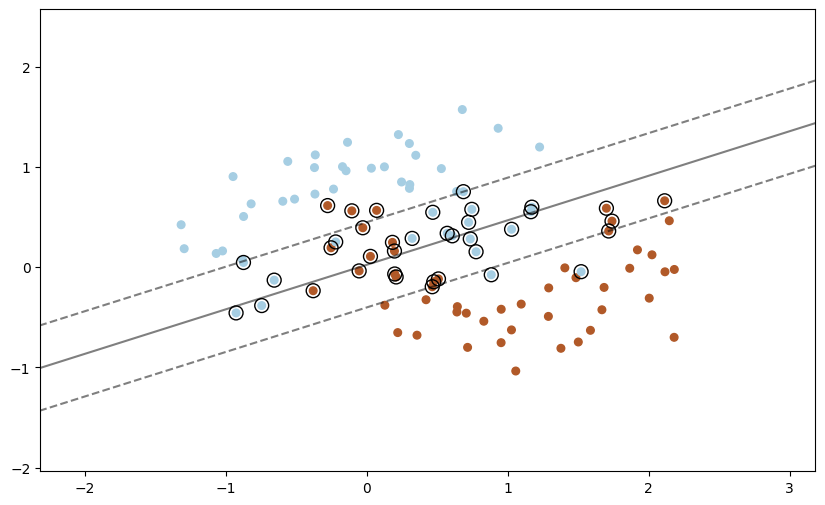

1

In [ ]:
add_point_to_plt(model=rbf, X=X, y=y)

## Ejemplo con todos los casos

In [ ]:
# Numpy
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import make_pipeline

# Datasets
from sklearn.datasets import make_circles, make_classification, make_moons

# Classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Charts
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
def graficar_datos(X_train, y_train, X_test, y_test, x_lim, y_lim, idx=None, i=None):
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(["#FF0000", "#0000FF"])
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  if idx == 0:
      ax.set_title("Input data")
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  # Plot the testing points
  ax.scatter(
      X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
  )
  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  ax.set_xticks(())
  ax.set_yticks(())

In [ ]:
def plot_all_cases(datasets, names, classifiers):
  figure = plt.figure(figsize=(27, 9))
  i = 1
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # Preprocesamiento del dataset en train y test
      # Podemos usar train_test_split porque estamos usando métodos
      # de scikit learn donde cada fila es independiente
      X, y = ds
      X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.4, random_state=42
      )

      x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
      y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

      # Graficando dataset
      graficar_datos(
          X_train, y_train,
          X_test, y_test,
          x_lim=(x_min, x_max),
          y_lim=(y_min, y_max),
          idx=ds_cnt, i=i
      )

      i += 1

      cm = plt.cm.RdBu
      cm_bright = ListedColormap(["#FF0000", "#0000FF"])

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

          clf = make_pipeline(StandardScaler(), clf)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)
          DecisionBoundaryDisplay.from_estimator(
              clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
          )

          # Plot the training points
          ax.scatter(
              X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
          )
          # Plot the testing points
          ax.scatter(
              X_test[:, 0],
              X_test[:, 1],
              c=y_test,
              cmap=cm_bright,
              edgecolors="k",
              alpha=0.6,
          )

          ax.set_xlim(x_min, x_max)
          ax.set_ylim(y_min, y_max)
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(
              x_max - 0.3,
              y_min + 0.3,
              ("%.2f" % score).lstrip("0"),
              size=15,
              horizontalalignment="right",
          )
          DecisionBoundaryDisplay.from_estimator(
            clf,
            X_train,
            plot_method="contour",
            cmap=cm_bright,
            levels=[-1, 0, 1],
            alpha=0.5,
            linestyles=["--", "-", "--"],
            ax=ax,
          )
          i += 1

  plt.tight_layout()
  plt.show()

In [ ]:
names = [
    "K-Vecinos",
    "SVM Lineal",
    "SVM Radial Basis Functions",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_blobs(n_samples=100, n_features=2, centers=2, random_state=20),
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

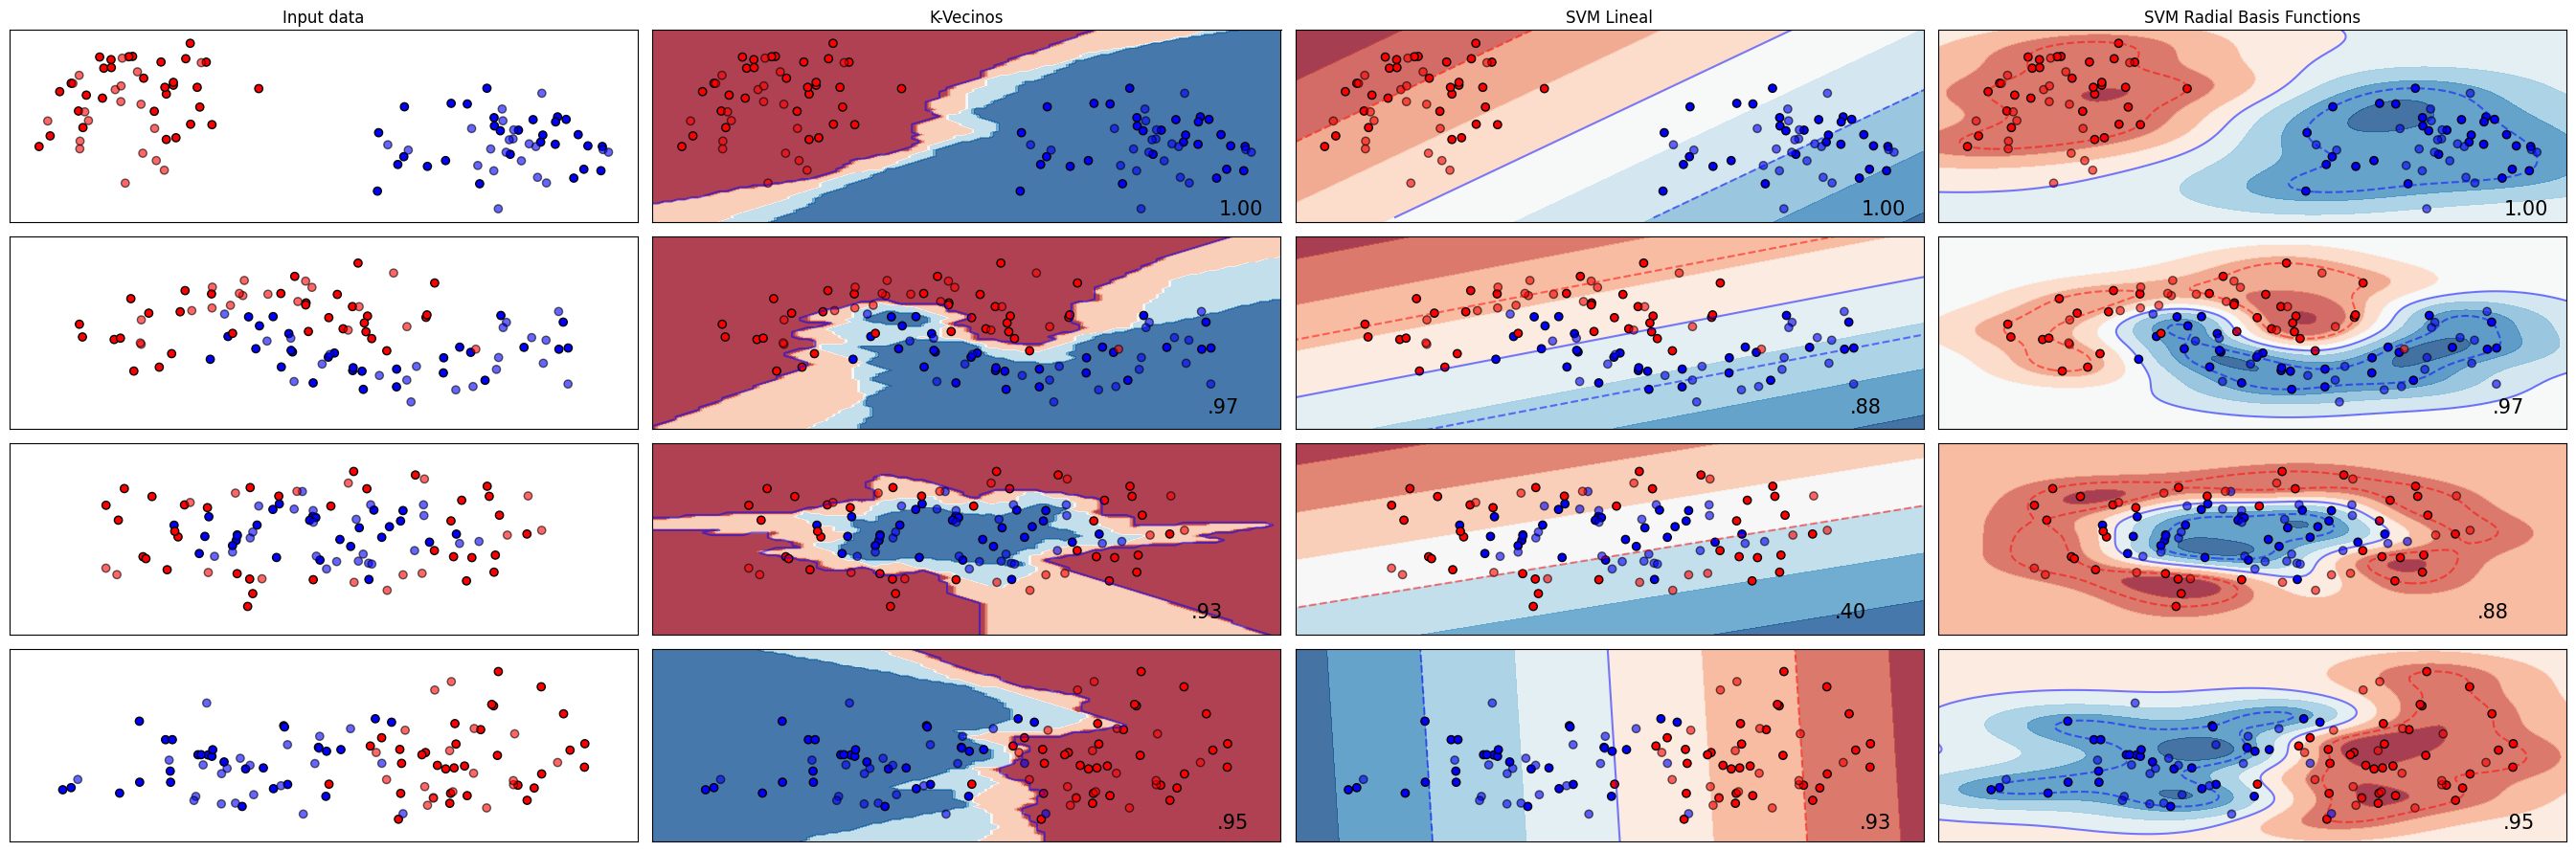

In [ ]:
plot_all_cases(datasets, names, classifiers)